# Day 2: 4th order solvers vs. 2nd order

Since we've worked so hard do make our solver, let's never have to do it again, by using it as an external function.  For this we'll use the ```hermite_library``` you can download from the day 4 webpage.

Let's import our usual things:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's also use the same parameter's we've used before:

In [3]:
# in solar masses
M1 = 0.0009 # Jupiter
M2 = 1.0 # sun

# initial parameters
rp = 1.0 # in AU 
vp = 35.0 # in km/s


Start with our defaults for time:

In [4]:
delta_t = 1e5
n_steps = 5000

Now let's import some functions from the hermite library!  Remember: this library has to be in the same directory as this current .ipynb file.

In [5]:
from hermite_library import do_hermite

The calling sequence for this will be a little different.  We will assume that we have a central star (in $M_\odot$, or solar masses) and then an array of planet masses in Jupiter masses ($M_J$).  

Though we'll input 3D positions and velocities, we'll only populate the x & y coordinates... for now...

We can add other planets pretty simply - by adding them to our array of planet initial positions and velocities!

In [12]:
star_mass = 1.0 # stellar mass in Msun
planet_masses = np.array( [1.0, 
                           0.5]) # planet masses in Mjupiter

# [x,y,z] coords for each planet in AU
planet_initial_position = np.array([ [1.0, 0.0, 0.0],
                                     [0.0, 1.0, 0.0]])

# planet's velocity at each position in km/s
planet_initial_velocity = np.array([ [0.0, 35.0, 0.0],
                                     [-35.0, 0.0, 0.0]])

# note: this assumes that the star is at (0, 0, 0) and has zero 
#  initial velocity

We output our variables as:
1. radius is output in AU
1. velocity is in km/s
1. time is in seconds
1. energy is normalized to its initial condition

In [13]:
# calculate!

# h is for hermite!
r_h, v_h, t_h, e_h = do_hermite(star_mass, 
                                planet_masses, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                                tfinal=delta_t*n_steps, Nsteps=n_steps)

# NOTE: here tfinal is (delta_t) X #steps from the Euler runs
#t_h = t_h/(365.*24*60*60)

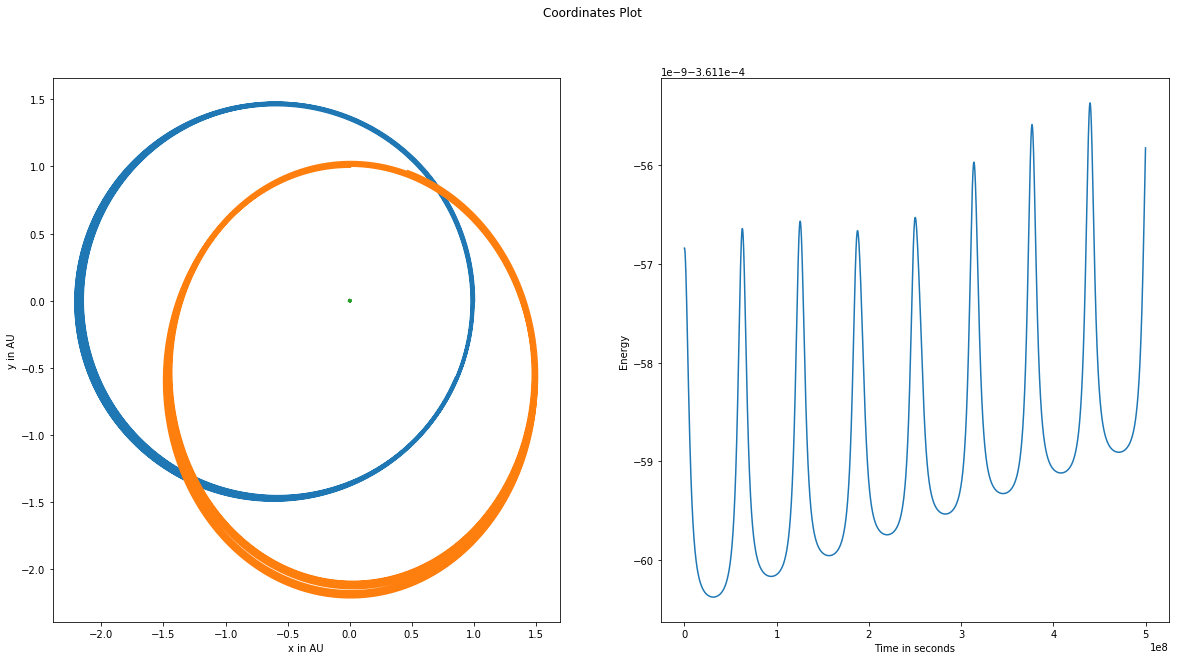

In [15]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# plot Hermite solution, with line width = 3
ax[0].plot(r_h[0,0,:], r_h[0,1,:], lw=3)
# particle 2
ax[0].plot(r_h[1,0,:], r_h[1,1,:], lw=3)
# particle 3 ( the star )
ax[0].plot(r_h[2,0,:], r_h[2,1,:], lw=3)

ax[1].set_xlabel('Time in seconds')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t_h, e_h)

plt.show()

**Take some time to play with the 3-body system here**

Then:

But what if we want to change our number of masses but we don't wanna keep having to add plots? Our old friend the for-loop!

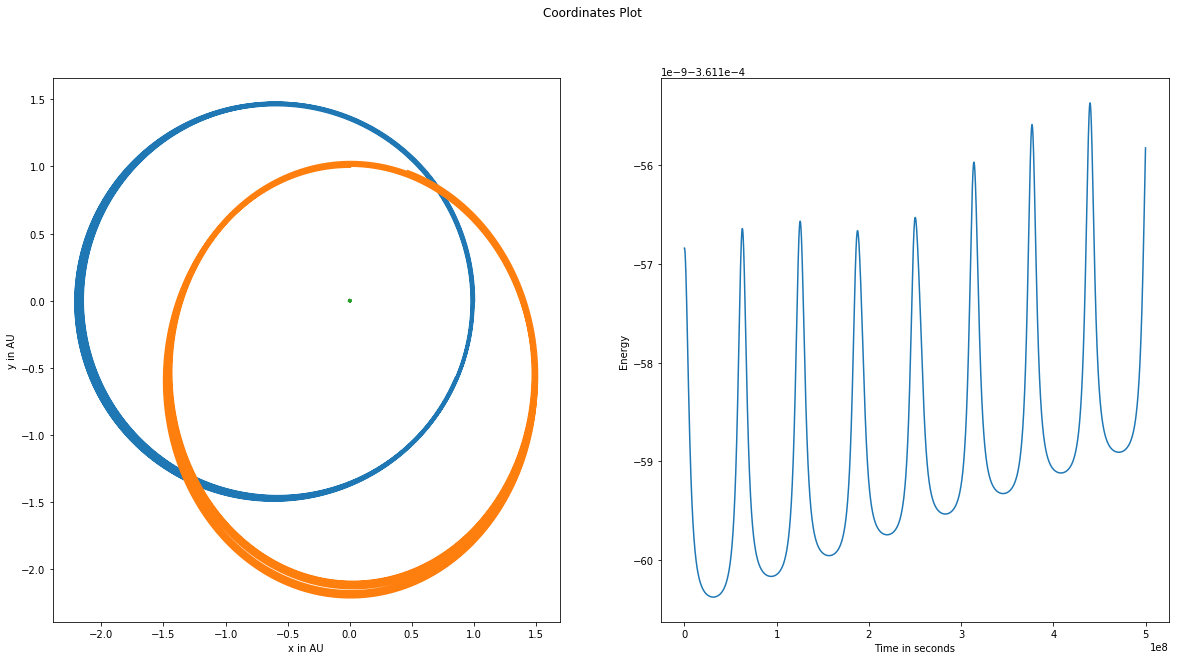

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# plot Hermite solution, with line width = 3
for i in range(r_h.shape[0]):
    # particle i
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

ax[1].set_xlabel('Time in seconds')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t_h, e_h)

plt.show()

In [17]:
r_h.shape

(3, 3, 5000)